# Wallet Network Projections Analysis 

This Notebook shows general properties of the validated Token network projections

In [5]:
import networkx as nx
import matplotlib.pyplot as plt


In [6]:
import os

# Set the environment variable
os.environ['DATA_DIRECTORY'] = '/Users/liamk/Desktop/DATA_DIRECTORY'

# Now you can use the environment variable as in the original script
path = os.environ['DATA_DIRECTORY']

print(f'The data path is set to: {path}')

The data path is set to: /Users/liamk/Desktop/DATA_DIRECTORY


In [7]:
import pandas as pd
import numpy as np
import networkx as nx 

import matplotlib.pyplot as plt
from ast import literal_eval

from os.path import join
import os

# from token_projection.token_projection import *
# from utilities.metrics_and_tests import * 
# from utilities.utils import * 

from dotenv import load_dotenv
load_dotenv()  

#path = os.environ['DATA_DIRECTORY']
# covalent_key = os.environ['COVALENTHQ_API_KEY']
df_snapshots = pd.read_csv('/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_selection.csv')
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format
df_tokens = pd.read_csv("/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv")

# Convert DataFrame to a dictionary where keys are addresses and values are symbols
address_to_symbol = pd.Series(df_tokens['symbol'].values, index=df_tokens['address']).to_dict()
address_to_symbol

# df_tokens = pd.read_csv('../assets/df_final_token_selection_20230813.csv')

# remove burner addresses 
known_burner_addresses = ['0x0000000000000000000000000000000000000000',
                        '0x0000000000000000000000000000000000000000',
                        '0x0000000000000000000000000000000000000001',
                        '0x0000000000000000000000000000000000000002',
                        '0x0000000000000000000000000000000000000003',
                        '0x0000000000000000000000000000000000000004',
                        '0x0000000000000000000000000000000000000005',
                        '0x0000000000000000000000000000000000000006',
                        '0x0000000000000000000000000000000000000007',
                        '0x000000000000000000000000000000000000dead']

### NOTE: YOU NEED TO RE-RUN TOKEN VALIDATION --> REMOVAL OF BITDAO CAUSED THIS.
### ALSO DOUBLE CHECK THAT BITDAO IS THE PROBLEM AND NOT AURA !!! 


In [8]:
input_directory = os.path.join(path, '../data/validated_wallet_projection_graphs')
graphs, dates = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

NameError: name 'load_wallet_graphs_from_snapshots' is not defined

In [41]:
# Helper function to process each snapshot
def process_snapshot(snapshot, df_addresses):
    start_time = time.time()
    
    dtypes = {
        'label': 'object',  # Specify dtype for the label column
        # Add other columns with their expected dtypes if necessary
    }
    
    ddf = dd.read_csv(
        join(path, f'data/snapshot_token_balance_tables_enriched/token_holder_snapshot_balance_labelled_{snapshot}.csv'),
        dtype=dtypes
    )   
    
    # Efficient filtering using Dask
    ddf = ddf[(ddf['value'] > 0) & 
              (ddf.pct_supply > 0.01) &
              (~ddf['address'].isin(KNOWN_BURNER_ADDRESSES)) & 
              (ddf['token_address'].isin(df_addresses['address']))]

    present_addresses = ddf['address'].unique().compute()
    pop_size = len(ddf['token_address'].unique().compute())

    # Validate wallet links in parallel
    validated_links = validate_wallet_links(present_addresses, ddf.compute(), pop_size)

    G = nx.Graph()
    G.add_edges_from(validated_links['combination'])

    # Store the graph with a name based on snapshot height
    nx.write_graphml(G, join(OUTPUT_PATH, f'validated_wallet_projection_graph_{snapshot}.graphml'))

    end_time = time.time()
    time_taken = end_time - start_time
    return snapshot, time_taken

In [42]:
import os
import time
import dask.dataframe as dd
import networkx as nx
from os.path import join

# Known burner addresses (example placeholder)
KNOWN_BURNER_ADDRESSES = {'0x000000000000000000000000000000000000dead'}

# Example OUTPUT_PATH (set accordingly)
OUTPUT_PATH = '/path/to/output'

# Helper function to validate wallet links (dummy implementation)
def validate_wallet_links(addresses, df, pop_size):
    # Dummy implementation for illustration
    validated_links = {'combination': [(a, b) for a in addresses for b in addresses if a != b]}
    return validated_links

# Helper function to process each snapshot
def process_snapshot(snapshot, df_addresses):
    start_time = time.time()
    
    dtypes = {
        'label': 'object',  # Specify dtype for the label column
        # Add other columns with their expected dtypes if necessary
    }
    
    file_path = join(path, f'data/snapshot_token_balance_tables_enriched/token_holder_snapshot_balance_labelled_{snapshot}.csv')
    
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File does not exist: {file_path}")
        return snapshot, None
    
    print(f"Processing snapshot: {snapshot}")
    print(f"Reading file: {file_path}")
    
    ddf = dd.read_csv(file_path, dtype=dtypes)
    
    # Efficient filtering using Dask
    ddf = ddf[(ddf['value'] > 0) & 
              (ddf.pct_supply > 0.01) &
              (~ddf['address'].isin(KNOWN_BURNER_ADDRESSES)) & 
              (ddf['token_address'].isin(df_addresses['address']))]
    
    print("Filtering complete")
    
    present_addresses = ddf['address'].unique().compute()
    pop_size = len(ddf['token_address'].unique().compute())

    print(f"Number of present addresses: {len(present_addresses)}")
    print(f"Population size: {pop_size}")
    
    # Validate wallet links in parallel
    validated_links = validate_wallet_links(present_addresses, ddf.compute(), pop_size)
    
    G = nx.Graph()
    G.add_edges_from(validated_links['combination'])

    output_file = join(OUTPUT_PATH, f'validated_wallet_projection_graph_{snapshot}.graphml')
    nx.write_graphml(G, output_file)
    
    print(f"Graph saved to: {output_file}")
    
    end_time = time.time()
    time_taken = end_time - start_time
    print(f"Time taken for snapshot {snapshot}: {time_taken:.2f} seconds")
    
    return snapshot, time_taken

# Example usage
# Assuming df_addresses is a DataFrame with a column 'address'
df_addresses = pd.DataFrame({'address': ['0x123', '0x456', '0x789']})
snapshot = '20210101'
path = '/Users/liamk/research-project-erc20-governance'

# Call the function with a snapshot
result = process_snapshot(snapshot, df_addresses)
print(f"Result: {result}")


File does not exist: /Users/liamk/research-project-erc20-governance/data/snapshot_token_balance_tables_enriched/token_holder_snapshot_balance_labelled_20210101.csv
Result: ('20210101', None)


In [25]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
import pandas as pd
import numpy as np 
from src.utilities.metrics_and_tests import jaccard_similarity


def load_token_graphs_from_snapshots(df_snapshots, input_directory):
    """
    Load graphs from the given snapshots and store them in a dictionary.

    Parameters:
    df_snapshots (pd.DataFrame): DataFrame containing snapshot information with 'Block Height' and 'Date' columns.
    path (str): Base directory path where the graph files are located.

    Returns:
    dict: A dictionary containing loaded graphs with snapshot as the key.
    dict: A dictionary containing dates with snapshot as the key.
    """
    
    graphs = {}
    dates = {}
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_token_projection_graph_{snapshot}.graphml")
        
        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
        else:
            print(f"Graph file for snapshot {snapshot} does not exist.")
    
    return graphs, dates

def load_wallet_graphs_from_snapshots(df_snapshots, input_directory):
    """
    Load graphs from the given snapshots and store them in a dictionary.

    Parameters:
    df_snapshots (pd.DataFrame): DataFrame containing snapshot information with 'Block Height' and 'Date' columns.
    path (str): Base directory path where the graph files are located.

    Returns:
    dict: A dictionary containing loaded graphs with snapshot as the key.
    dict: A dictionary containing dates with snapshot as the key.
    """
    
    graphs = {}
    dates = {}
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_wallet_projection_graph_{snapshot}.graphml")
        
        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
        else:
            print(f"Graph file for snapshot {snapshot} does not exist.")
    
    return graphs, dates


def calculate_similarity_matrix(graphs):
    """
    Calculate the Jaccard Similarity matrix for a dictionary of graphs.

    Parameters:
    graphs (dict): A dictionary of graphs with snapshots as keys.

    Returns:
    np.ndarray: A 2D numpy array representing the similarity matrix.
    list: A sorted list of snapshot keys.
    """
    snapshot_list = sorted(graphs.keys())
    similarity_matrix = np.zeros((len(snapshot_list), len(snapshot_list)))

    for i, snapshot1 in enumerate(snapshot_list):
        for j, snapshot2 in enumerate(snapshot_list):
            if i <= j:
                similarity = jaccard_similarity(graphs[snapshot1], graphs[snapshot2])
                similarity_matrix[i, j] = similarity
                similarity_matrix[j, i] = similarity  # Symmetric matrix

    return similarity_matrix, snapshot_list


def visualize_wallet_network_grid(graphs, dates, address_to_symbol, output_directory, layout=nx.kamada_kawai_layout):
    # Define the grid size
    rows, cols = 3, 6  # Adjust based on the number of graphs
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    axes = axes.flatten()  # Flatten to iterate easily
    
    for ax, (snapshot, graph) in zip(axes, graphs.items()):
        # Relabel nodes with symbols using the mapping
        relabeled_graph = nx.relabel_nodes(graph, address_to_symbol)
        
        # Compute layout
        pos = layout(relabeled_graph)  
        
        # Draw the graph with relabeled nodes
        nx.draw(relabeled_graph, pos, ax=ax, with_labels=False, node_size=50, node_color='skyblue', edge_color='gray', font_size=8)
        ax.set_title(dates[snapshot], fontsize=10)
        ax.set_axis_off()  # Hide axis for clarity
        
        # Draw a rectangle around the plot area
        rect = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='black', facecolor='none', transform=ax.transAxes, clip_on=False)
        ax.add_patch(rect)

    # Turn off any unused subplots
    for i in range(len(graphs), len(axes)):
        axes[i].set_axis_off()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust the top spacing to accommodate title if necessary
    
    # Save the figure
    fig.suptitle('Validated Wallet Projections Over Time', fontsize=16)
    plt.savefig(os.path.join(output_directory, "wallet_projection_grid.png"), format='png', dpi=300)
    plt.show()
    

def plot_similarity_heatmap(similarity_matrix, snapshot_list, dates, output_directory):
    """
    Plot a heatmap of the Jaccard Similarity matrix.

    Parameters:
    similarity_matrix (np.ndarray): A 2D numpy array representing the similarity matrix.
    snapshot_list (list): A sorted list of snapshot keys.
    dates (dict): A dictionary of dates with snapshots as keys.
    """
    fig, ax = plt.subplots(figsize=(12, 10))  # Adjusted size to better fit more labels
    cax = ax.matshow(similarity_matrix, interpolation='nearest', cmap='coolwarm')
    fig.colorbar(cax)

    # Set the ticks and labels with dates
    date_labels = [dates[snapshot] for snapshot in snapshot_list]
    ax.set_xticks(range(len(snapshot_list)))
    ax.set_xticklabels(date_labels, rotation=90)  # Rotate for better readability
    ax.set_yticks(range(len(snapshot_list)))
    ax.set_yticklabels(date_labels)

    ax.xaxis.set_ticks_position('bottom')  # X-axis labels on the bottom

    # Set title with padding
    ax.set_title('Jaccard Similarity Heatmap of Graph Snapshots', size=16, pad=20)

    ax.set_xlabel('Snapshot Date')
    ax.set_ylabel('Snapshot Date')
    
    plt.savefig(os.path.join(output_directory, "jaccard_similarity.png"), format='png', dpi=300)

    plt.show()

## Visualise Network Projection of Snapshot over time

In [82]:
input_directory = os.path.join(path, '../data/validated_wallet_projection_graphs')
graphs, dates = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

Graph file for snapshot 7962629 does not exist.
Graph file for snapshot 8155117 does not exist.
Graph file for snapshot 8354625 does not exist.
Graph file for snapshot 8553607 does not exist.
Graph file for snapshot 8745378 does not exist.
Graph file for snapshot 8938208 does not exist.
Graph file for snapshot 9110216 does not exist.
Graph file for snapshot 9285458 does not exist.
Graph file for snapshot 9487426 does not exist.
Graph file for snapshot 9676110 does not exist.
Graph file for snapshot 9877036 does not exist.
Graph file for snapshot 10070789 does not exist.
Graph file for snapshot 10270349 does not exist.
Graph file for snapshot 10467362 does not exist.
Graph file for snapshot 10664157 does not exist.
Graph file for snapshot 10866666 does not exist.
Graph file for snapshot 11060222 does not exist.
Graph file for snapshot 11262275 does not exist.
Graph file for snapshot 11457486 does not exist.
Graph file for snapshot 11659570 does not exist.
Graph file for snapshot 1186121

In [83]:
import os
from os.path import join
from dotenv import load_dotenv
import dask.dataframe as dd
from tqdm import tqdm
import pandas as pd
import time
import numpy as np
import networkx as nx

from src.wallet_projection.wallet_projection_analysis import validate_wallet_links  # Adjust the import if necessary

load_dotenv()

path = os.environ['DATA_DIRECTORY']

# Constants
SNAPSHOT_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_selection.csv'
ADDRESS_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
OUTPUT_PATH = join(path, '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs')
SUPPLY_THRESHOLD = 0.01 # 0.01  equal 1% of token supply

KNOWN_BURNER_ADDRESSES = set([
    '0x0000000000000000000000000000000000000000', '0x000000000000000000000000000000000000dead',
    '0x0000000000000000000000000000000000000001', '0x0000000000000000000000000000000000000002',
    '0x0000000000000000000000000000000000000003', '0x0000000000000000000000000000000000000004',
    '0x0000000000000000000000000000000000000005', '0x0000000000000000000000000000000000000006',
    '0x0000000000000000000000000000000000000007'
])

# Helper function to process each snapshot
def process_snapshot(snapshot, df_addresses):
    start_time = time.time()
    
    dtypes = {
        'label': 'object',  # Specify dtype for the label column
        # Add other columns with their expected dtypes if necessary
    }
    
    ddf = dd.read_csv(
        join(path, f'/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_token_balance_tables_enriched/token_holder_snapshot_balance_labelled_{snapshot}.csv'),
        dtype=dtypes
    )   
    
    # Efficient filtering using Dask
    ddf = ddf[(ddf['value'] > 0) & 
              (ddf.pct_supply > SUPPLY_THRESHOLD) &
              (~ddf['address'].isin(KNOWN_BURNER_ADDRESSES)) & 
              (ddf['token_address'].isin(df_addresses['address']))]

    present_addresses = ddf['address'].unique().compute()
    pop_size = len(ddf['token_address'].unique().compute())

    # Validate wallet links in parallel
    validated_links = validate_wallet_links(present_addresses, ddf.compute(), pop_size)

    G = nx.Graph()
    G.add_edges_from(validated_links['combination'])

    # Store the graph with a name based on snapshot height
    nx.write_graphml(G, join(OUTPUT_PATH, f'validated_wallet_projection_graph_{snapshot}.graphml'))

    end_time = time.time()
    time_taken = end_time - start_time
    return snapshot, time_taken

# Main function to load, process data, and generate network graphs
def generate_network_graphs():
    df_snapshot = pd.read_csv(SNAPSHOT_CSV_PATH)
    df_addresses = pd.read_csv(ADDRESS_CSV_PATH)

    snapshots = df_snapshot[df_snapshot['Block Height'] >= 11659570]['Block Height']

    total_snapshots = len(snapshots)
    total_time = 0

    with tqdm(total=total_snapshots) as pbar:
        for snapshot in snapshots:
            snapshot, time_taken = process_snapshot(snapshot, df_addresses)
            total_time += time_taken
            avg_time_per_snapshot = total_time / (pbar.n + 1)
            estimated_total_time = avg_time_per_snapshot * total_snapshots
            remaining_time = estimated_total_time - total_time
            pbar.set_postfix({
                'Snapshot': snapshot,
                'Time per snapshot': f'{avg_time_per_snapshot:.2f}s',
                'Remaining time': f'{remaining_time:.2f}s'
            })
            pbar.update(1)

if __name__ == "__main__":
    generate_network_graphs()

ModuleNotFoundError: No module named 'src'

In [84]:
# Replace 'path/to/your/file.graphml' with the actual path to your GraphML file
graph_file_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_11659570.graphml'

# Load the graph from the GraphML file
G = nx.read_graphml(graph_file_path)


Graph has 118 nodes and 883 edges
Node degrees: {'0x5165d24277cd063f5ac44efd447b27025e888f37': 15, '0xf977814e90da44bfa03b6295a0616a897441acec': 15, '0xe93381fb4c4f14bda253907b18fad305d799241a': 26, '0x4750c43867ef5f89869132eccf19b9b6c4286e1a': 16, '0xbe0eb53f46cd790cd13851d5eff43d12404d33e8': 41, '0xbac8f2448239f371eb793b83b82945bfac741ae0': 16, '0x05e793ce0c6027323ac150f6d45c2344d28b6019': 20, '0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d': 20, '0x662d905a1795ffdf8cfab0abe670dbff3a9fd247': 16, '0xe3953d9d317b834592ab58ab2c7a6ad22b54075d': 16, '0xaede09a1b7ab8c4dd18e98bc6bafcae1e184b700': 16, '0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3': 37, '0x642ae78fafbb8032da552d619ad43f1d81e4dd7c': 20, '0xd0ed69e40a5b044d59411cf6ddc653c8c3924d10': 20, '0x9f41cecc435101045ea9f41d4ee8c5353f77e5d5': 16, '0x61c808d82a3ac53231750dadc13c777b59310bd9': 17, '0xb842afd82d940ff5d8f6ef3399572592ebf182b0': 17, '0x3d30b1ab88d487b0f3061f40de76845bec3f1e94': 16, '0x0f89d54b02ca570de82f770d33c7b7cf7b3c3394': 17, '

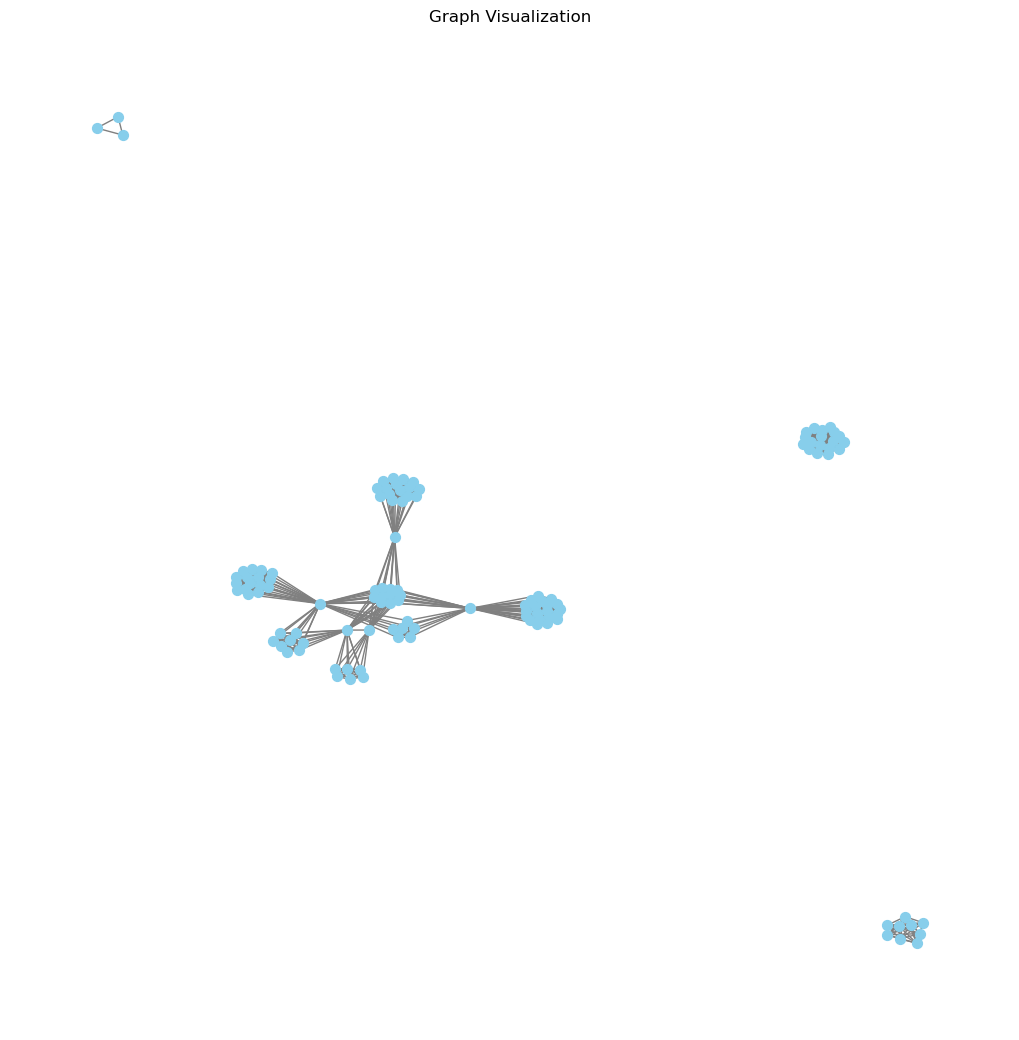

In [85]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the GraphML file
graph_file_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_11659570.graphml'
G = nx.read_graphml(graph_file_path)

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

# Compute and print the degree of each node
degrees = dict(G.degree())
print("Node degrees:", degrees)

# Find and print all the connected components
connected_components = list(nx.connected_components(G))
print("Connected components:", connected_components)

# Draw the graph without labels
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # You can choose a different layout if you prefer
nx.draw(G, pos, with_labels=False, node_size=50, node_color='skyblue', edge_color='gray', font_size=8)
plt.title('Graph Visualization')
plt.show()

# Save the modified graph back to a GraphML file if needed
# modified_graph_file_path = 'path/to/your/modified_file.graphml'
# nx.write_graphml(G, modified_graph_file_path)


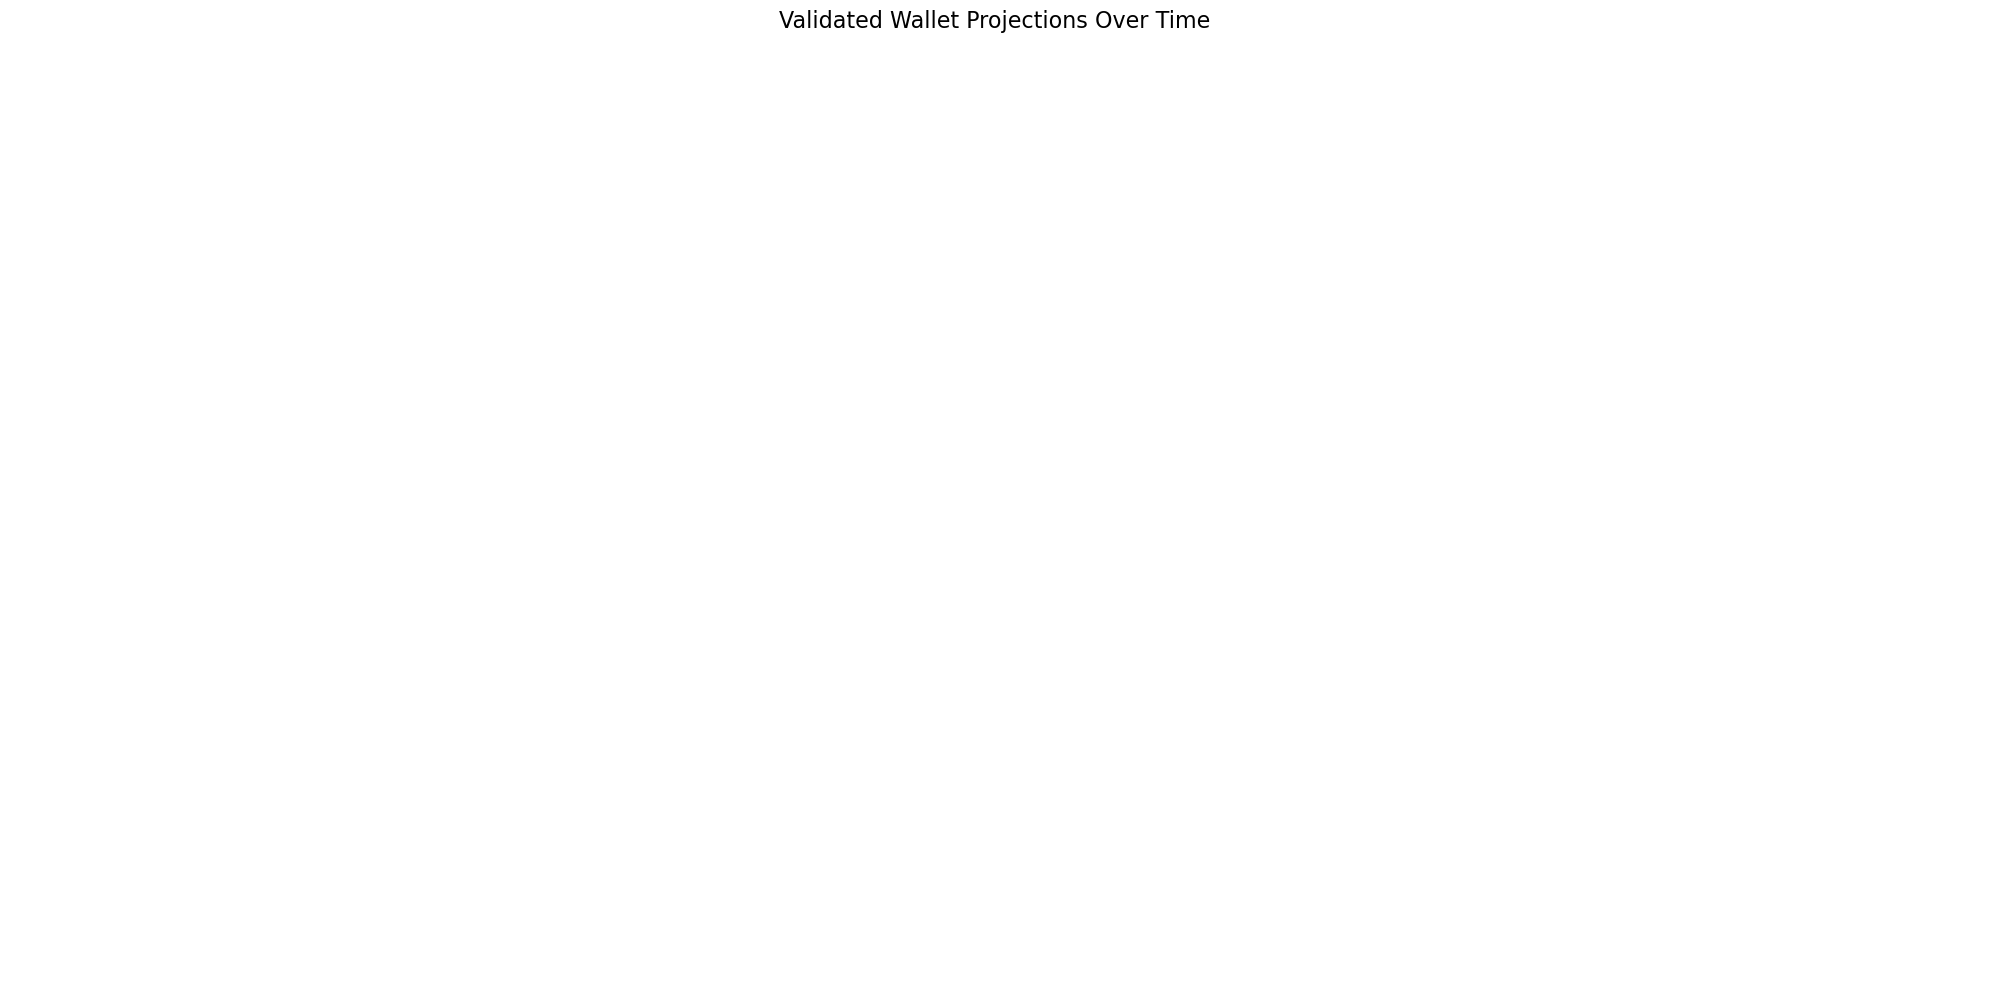

In [86]:
visualize_wallet_network_grid(graphs, dates, address_to_symbol, output_directory='/Users/liamk/Desktop/DATA_DIRECTORY/output', layout=nx.kamada_kawai_layout)

In [87]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_wallet_network_grid(graphs, dates, address_to_symbol, output_directory, layout=nx.spring_layout):
    # Define the grid size
    rows, cols = 3, 6  # Adjust based on the number of graphs
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    axes = axes.flatten()  # Flatten to iterate easily
    
    for ax, (snapshot, graph) in zip(axes, graphs.items()):
        print(f"Processing snapshot: {snapshot}")
        
        # Check if the graph has nodes and edges
        if len(graph.nodes) == 0 or len(graph.edges) == 0:
            print(f"Graph for snapshot {snapshot} is empty.")
            continue
        
        # Relabel nodes with symbols using the mapping
        relabeled_graph = nx.relabel_nodes(graph, address_to_symbol, copy=True)
        
        # Check if relabeling worked correctly
        if len(relabeled_graph.nodes) == 0 or len(relabeled_graph.edges) == 0:
            print(f"Relabeling failed for snapshot {snapshot}.")
            continue
        
        # Compute layout
        pos = layout(relabeled_graph)
        
        # Draw the graph with relabeled nodes
        nx.draw(relabeled_graph, pos, ax=ax, with_labels=False, node_size=100, node_color='skyblue', edge_color='gray', linewidths=0.5, font_size=8)
        
        # Draw nodes with a larger size for better visibility
        nx.draw_networkx_nodes(relabeled_graph, pos, ax=ax, node_size=100, node_color='skyblue', edge_color='black')
        nx.draw_networkx_edges(relabeled_graph, pos, ax=ax, edge_color='gray', width=1.0)
        
        ax.set_title(dates[snapshot], fontsize=12)
        ax.set_axis_off()  # Hide axis for clarity
        
        # Draw a rectangle around the plot area
        rect = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='black', facecolor='none', transform=ax.transAxes, clip_on=False)
        ax.add_patch(rect)

    # Turn off any unused subplots
    for i in range(len(graphs), len(axes)):
        axes[i].set_axis_off()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust the top spacing to accommodate title if necessary
    
    # Save the figure
    fig.suptitle('Validated Wallet Projections Over Time', fontsize=16)
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    plt.savefig(os.path.join(output_directory, "wallet_projection_grid.png"), format='png', dpi=300)
    plt.show()

# Example usage:
# visualize_wallet_network_grid(graphs, dates, address_to_symbol, output_directory='/Users/liamk/Desktop/DATA_DIRECTORY/output', layout=nx.spring_layout)



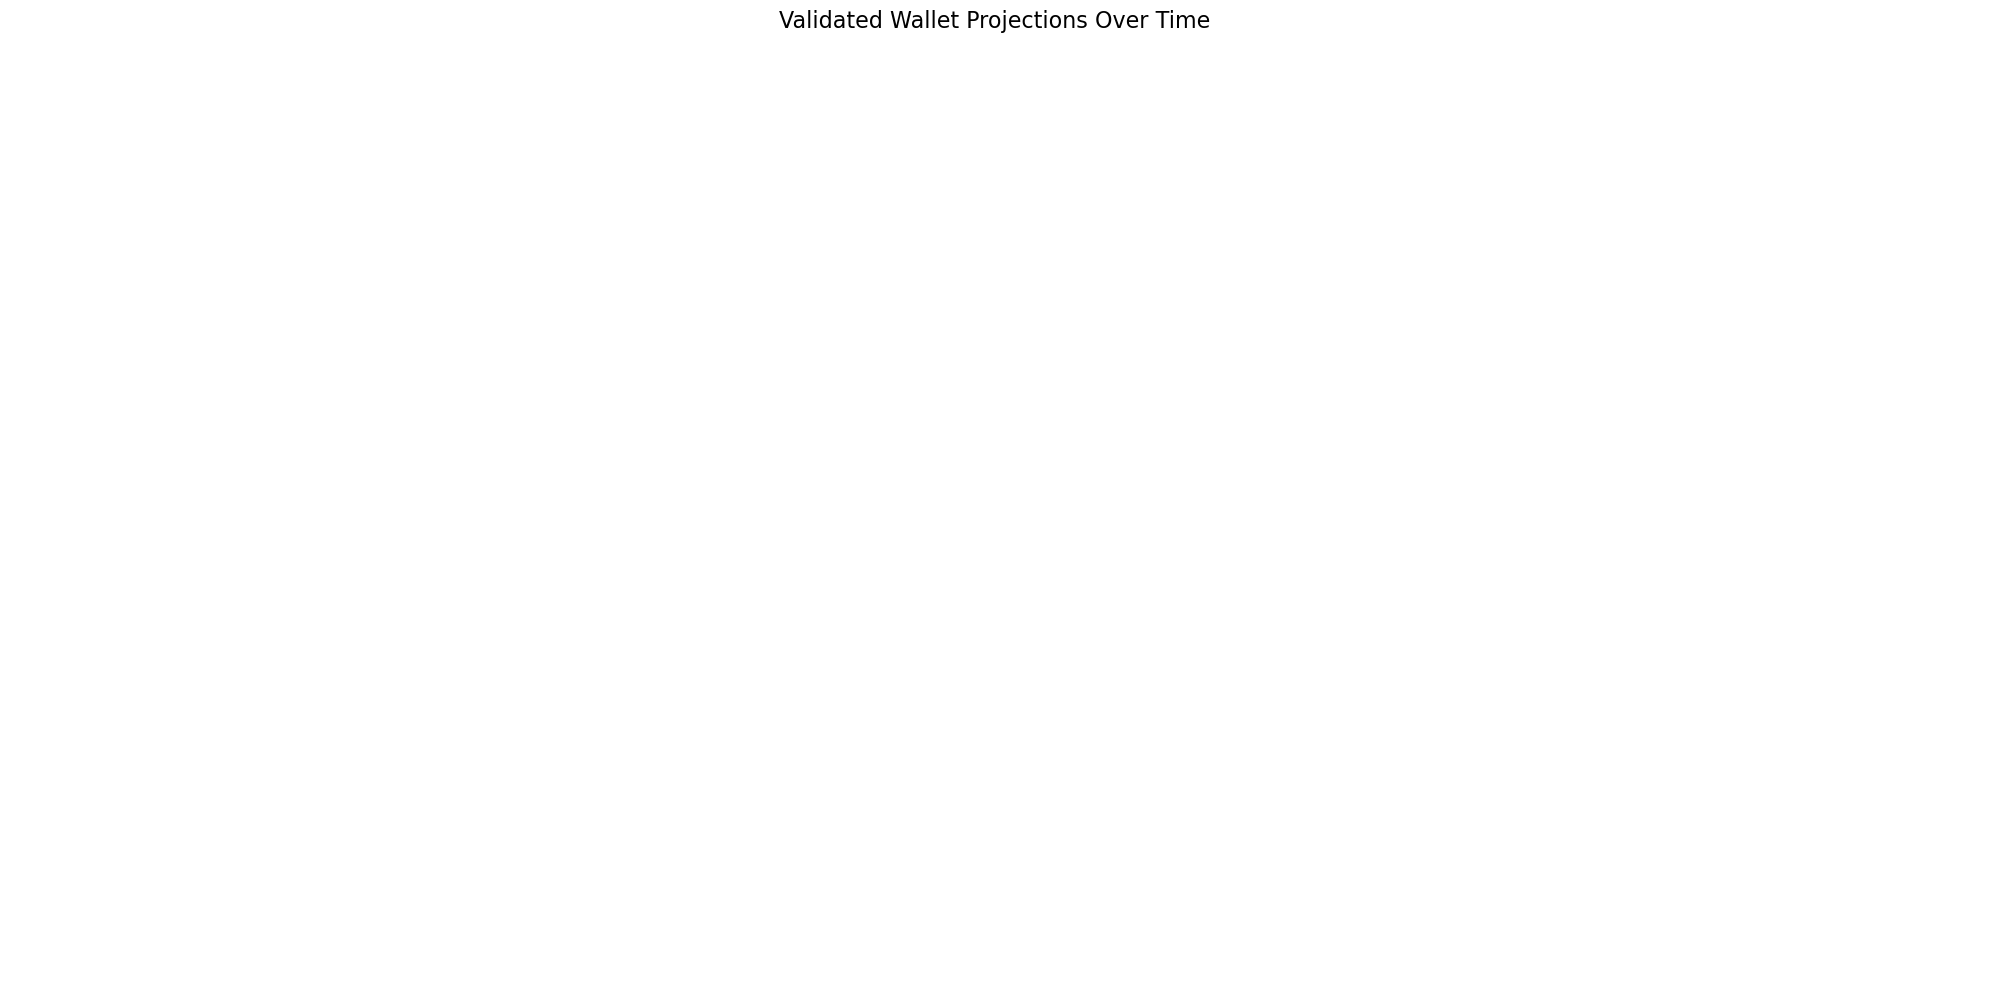

In [88]:
visualize_wallet_network_grid(graphs, dates, address_to_symbol, output_directory='/Users/liamk/Desktop/DATA_DIRECTORY/output', layout=nx.spring_layout)


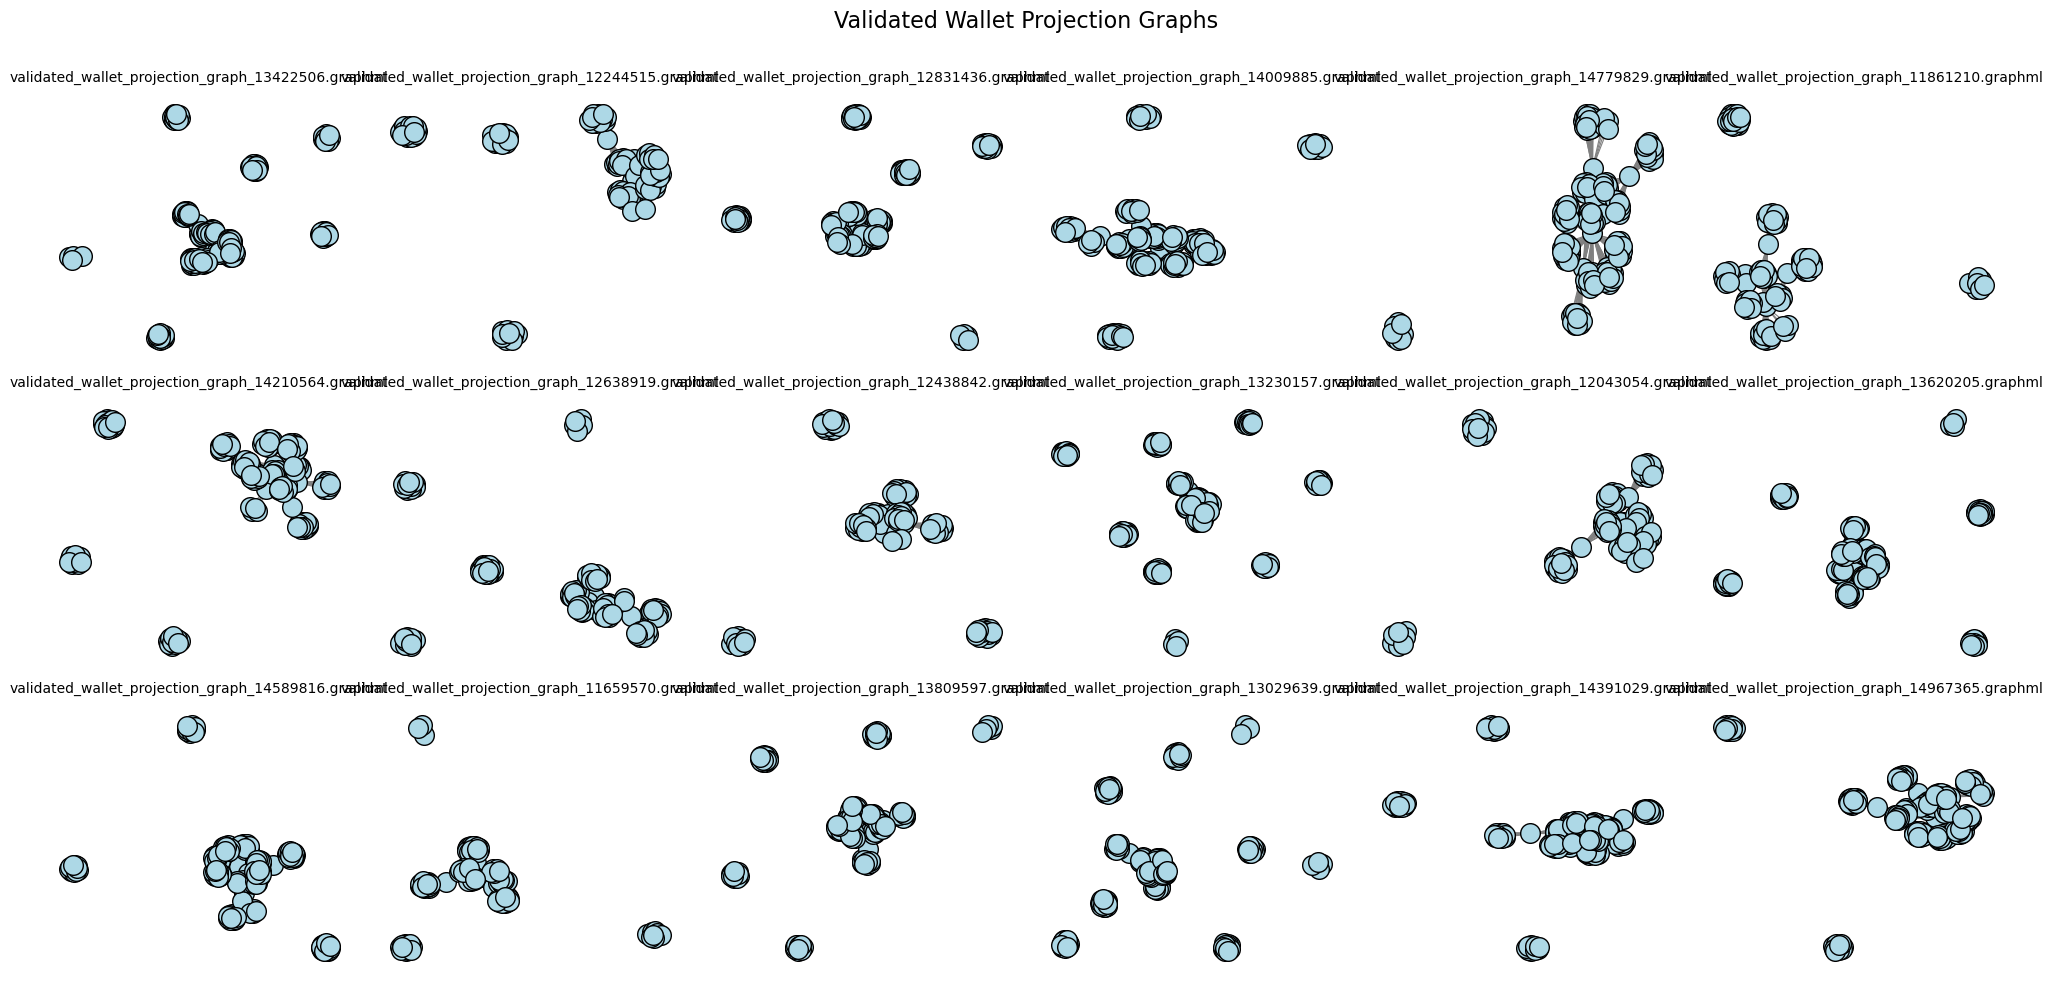

In [89]:
import os
import networkx as nx
import matplotlib.pyplot as plt

# Define the path to the directory containing the graph files
directory_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# List all .graphml files in the directory
graph_files = [f for f in os.listdir(directory_path) if f.endswith('.graphml')]

# Set up the grid size for plotting (adjust rows and cols based on your needs)
rows, cols = 3, 6  # Adjust based on the number of graphs and your preference
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()  # Flatten to iterate easily

# Iterate over each graph file and plot
for ax, graph_file in zip(axes, graph_files):
    graph_path = os.path.join(directory_path, graph_file)
    
    # Load the graph
    G = nx.read_graphml(graph_path)
    
    # Draw the graph without labels
    pos = nx.spring_layout(G)  # You can choose a different layout if you prefer
    
    # Draw nodes with larger size and different color
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=200, node_color='lightblue', edgecolors='black')
    
    # Draw edges with better color and width
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray', width=0.8)
    
    ax.set_title(os.path.basename(graph_file), fontsize=10)
    ax.set_axis_off()  # Hide axis for clarity

# Turn off any unused subplots
for i in range(len(graph_files), len(axes)):
    axes[i].set_axis_off()

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Validated Wallet Projection Graphs', fontsize=16)
plt.show()



Graph validated_wallet_projection_graph_13422506.graphml has 179 nodes and 1294 edges.


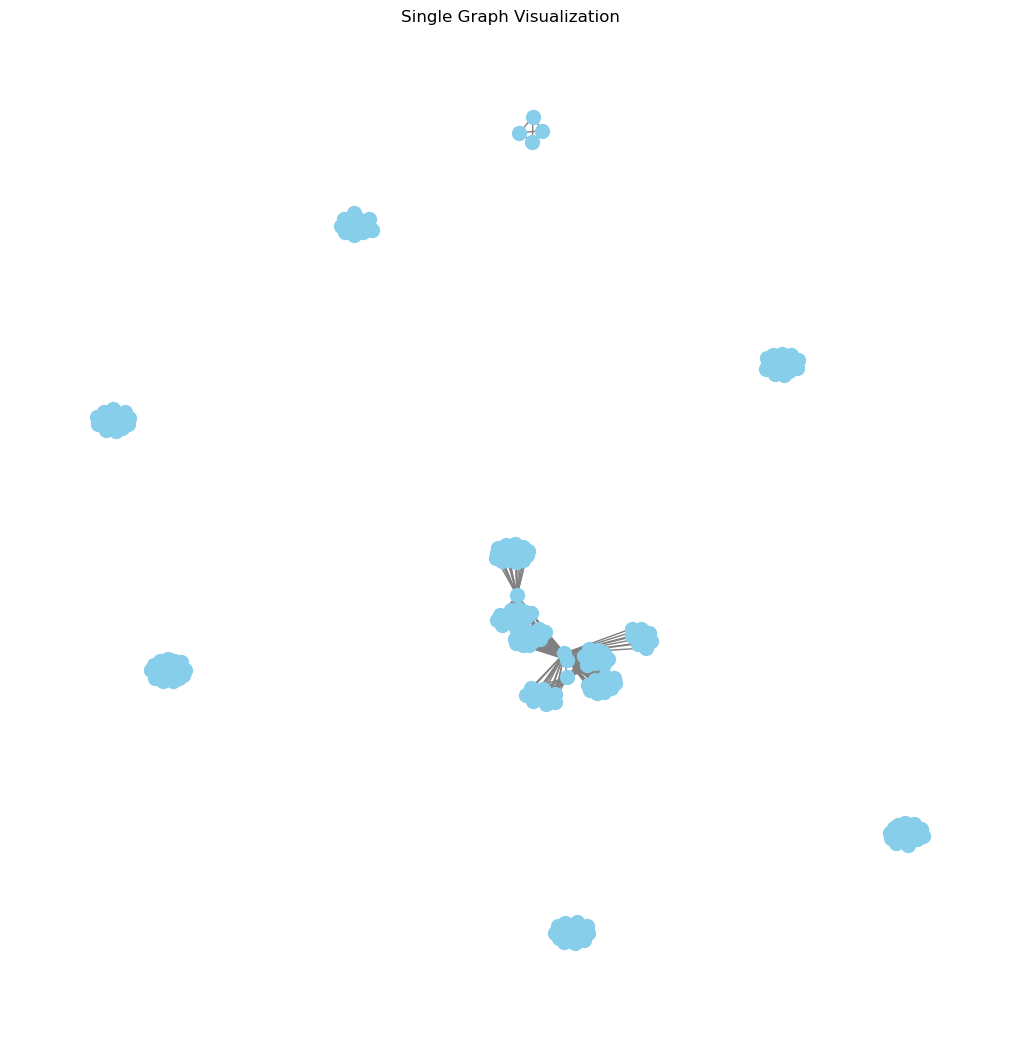

In [90]:
import os
import networkx as nx
import matplotlib.pyplot as plt

# Define the path to the directory containing the graph files
directory_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# List all .graphml files in the directory
graph_files = [f for f in os.listdir(directory_path) if f.endswith('.graphml')]

if len(graph_files) == 0:
    print("No .graphml files found in the directory.")
else:
    # Load a single graph
    graph_file = graph_files[0]
    graph_path = os.path.join(directory_path, graph_file)
    G = nx.read_graphml(graph_path)

    # Check if the graph has nodes and edges
    if len(G.nodes) == 0 or len(G.edges) == 0:
        print(f"Graph {graph_file} is empty.")
    else:
        print(f"Graph {graph_file} has {len(G.nodes)} nodes and {len(G.edges)} edges.")

        # Draw the graph without labels
        plt.figure(figsize=(10, 10))
        pos = nx.spring_layout(G)  # You can choose a different layout if you prefer
        nx.draw(G, pos, with_labels=False, node_size=100, node_color='skyblue', edge_color='gray')
        plt.title('Single Graph Visualization')
        plt.show()


Graph validated_wallet_projection_graph_13422506.graphml has 179 nodes and 1294 edges.


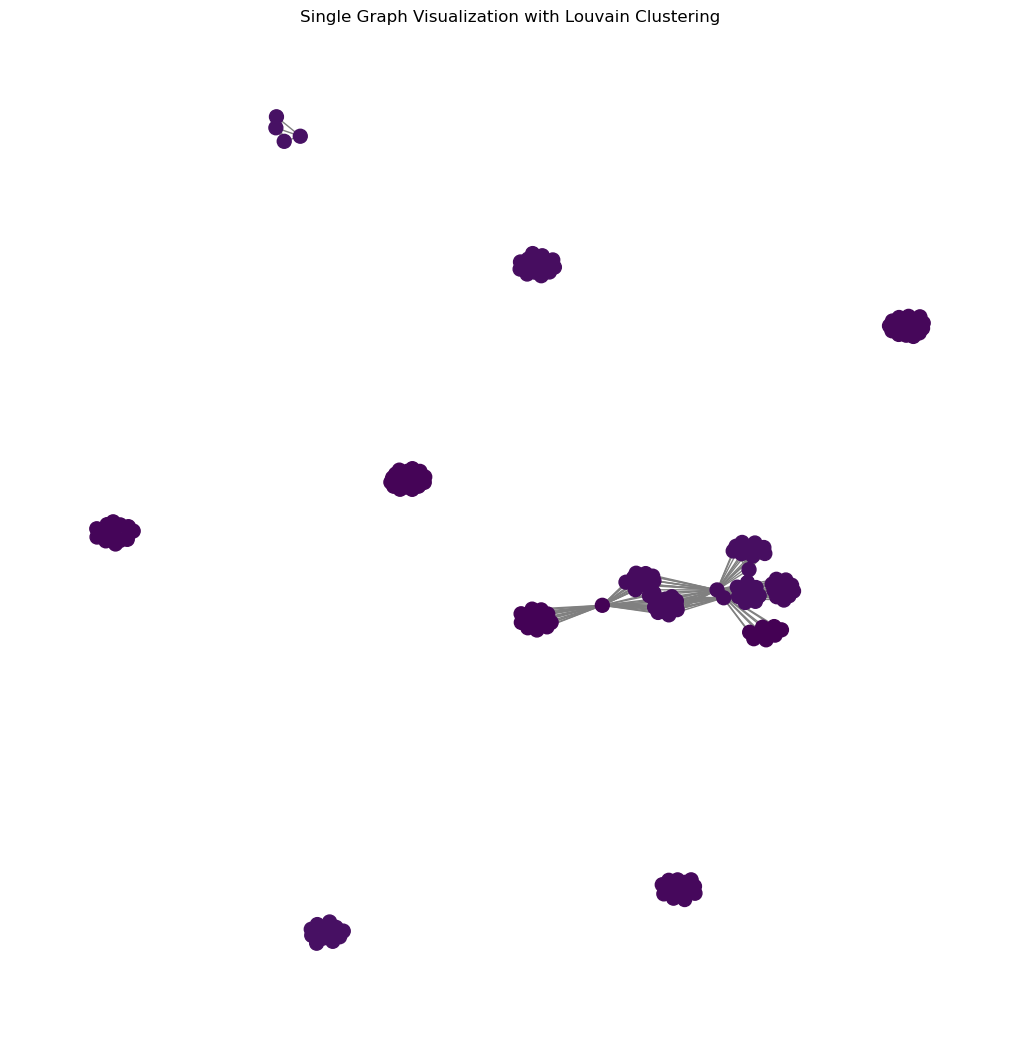

In [91]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Define the path to the directory containing the graph files
directory_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# List all .graphml files in the directory
graph_files = [f for f in os.listdir(directory_path) if f.endswith('.graphml')]

if len(graph_files) == 0:
    print("No .graphml files found in the directory.")
else:
    # Load a single graph
    graph_file = graph_files[0]
    graph_path = os.path.join(directory_path, graph_file)
    G = nx.read_graphml(graph_path)

    # Check if the graph has nodes and edges
    if len(G.nodes) == 0 or len(G.edges) == 0:
        print(f"Graph {graph_file} is empty.")
    else:
        print(f"Graph {graph_file} has {len(G.nodes)} nodes and {len(G.edges)} edges.")

        # Perform Louvain clustering
        partition = community_louvain.best_partition(G)

        # Draw the graph with clusters
        plt.figure(figsize=(10, 10))
        pos = nx.spring_layout(G)  # You can choose a different layout if you prefer

        # Color the nodes based on their cluster
        cmap = plt.get_cmap('viridis')
        colors = [cmap(partition[node]) for node in G.nodes()]
        nx.draw(G, pos, node_color=colors, with_labels=False, node_size=100, edge_color='gray')
        
        plt.title('Single Graph Visualization with Louvain Clustering')
        plt.show()


Graph validated_wallet_projection_graph_13422506.graphml has 179 nodes and 1294 edges.
Average clustering coefficient: 0.9772922266267328
Number of connected components: 8
Most central node (degree centrality): 0xf977814e90da44bfa03b6295a0616a897441acec
Detected communities: [['0x000be27f560fef0253cac4da8411611184356549', '0x0248374df0bf742386a278430cdf2cf8a95d6dd9', '0x05e793ce0c6027323ac150f6d45c2344d28b6019', '0x0a3f6849f78076aefadf113f5bed87720274ddc0', '0x11577a8a5baf1e25b9a2d89f39670f447d75c3cd', '0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d', '0x642ae78fafbb8032da552d619ad43f1d81e4dd7c', '0x69076e44a9c70a67d5b79d95795aba299083c275', '0x81fb0aa0ceeeba4ccafd0e67861de0b3174b0f5b', '0xbba4c8eb57df16c4cfabe4e9a3ab697a3e0c65d8', '0xbe8e3e3618f7474f8cb1d074a26affef007e98fb', '0xc4269cc7acdedc3794b221aa4d9205f564e27f0d', '0xc713e5e149d5d0715dcd1c156a020976e7e56b88', '0xca8d6f69d8f32516a109df68b623452cc9f5e64d', '0xd9b012a168fb6c1b71c24db8cee1a256b3caa2a2', '0xf37216a8ac034d08b4663108d7532

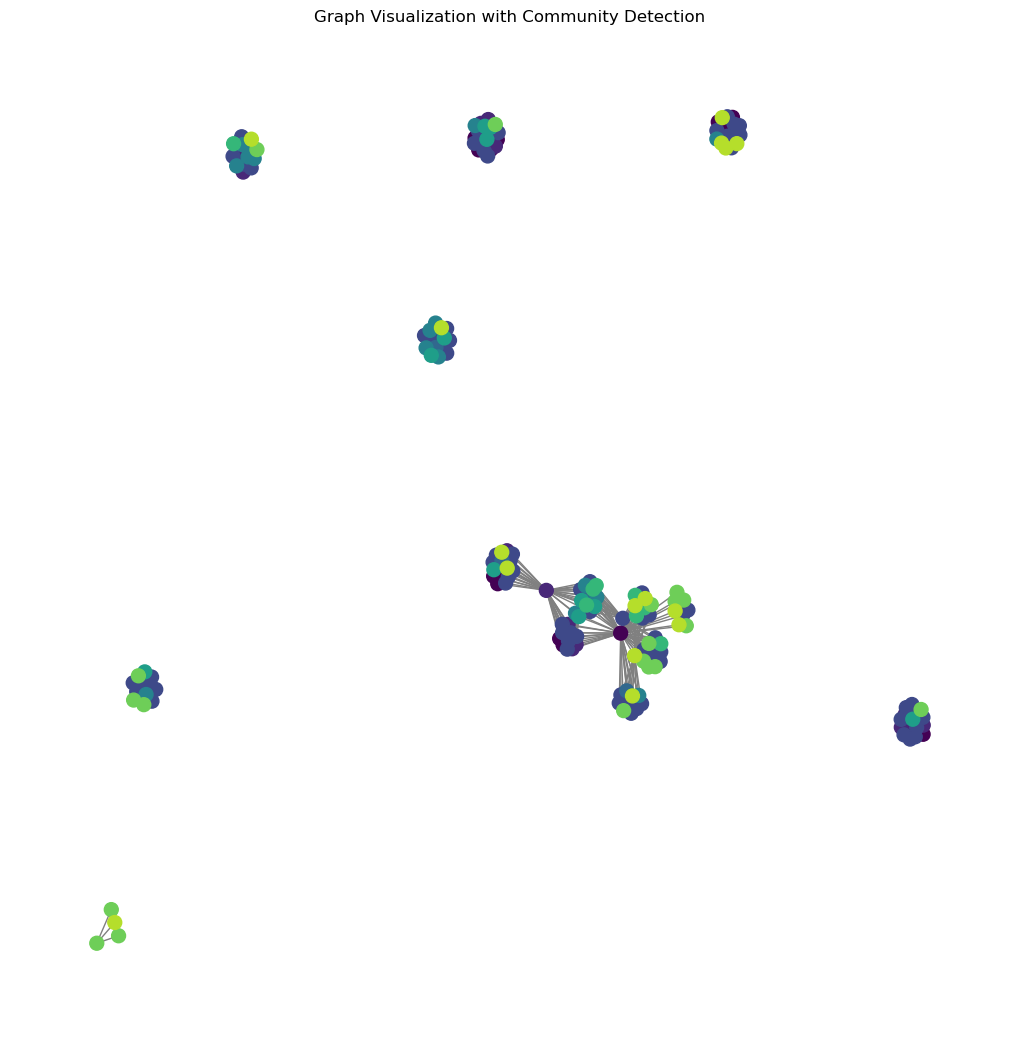

In [92]:
import os
import networkx as nx
import matplotlib.pyplot as plt

# Define the path to the directory containing the graph files
directory_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# List all .graphml files in the directory
graph_files = [f for f in os.listdir(directory_path) if f.endswith('.graphml')]

if len(graph_files) == 0:
    print("No .graphml files found in the directory.")
else:
    # Load a single graph
    graph_file = graph_files[0]
    graph_path = os.path.join(directory_path, graph_file)
    G = nx.read_graphml(graph_path)

    # Check if the graph has nodes and edges
    if len(G.nodes) == 0 or len(G.edges) == 0:
        print(f"Graph {graph_file} is empty.")
    else:
        print(f"Graph {graph_file} has {len(G.nodes)} nodes and {len(G.edges)} edges.")

        # Calculate clustering coefficient
        clustering_coeff = nx.average_clustering(G)
        print(f"Average clustering coefficient: {clustering_coeff}")

        # Calculate connected components
        connected_components = list(nx.connected_components(G))
        num_connected_components = len(connected_components)
        print(f"Number of connected components: {num_connected_components}")

        # Calculate node centrality measures
        degree_centrality = nx.degree_centrality(G)
        closeness_centrality = nx.closeness_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G)

        # Find the most central node based on degree centrality
        most_central_node = max(degree_centrality, key=degree_centrality.get)
        print(f"Most central node (degree centrality): {most_central_node}")

        # Perform community detection using the Girvan-Newman algorithm
        from networkx.algorithms.community import girvan_newman
        communities = girvan_newman(G)
        top_level_communities = next(communities)
        sorted_communities = sorted(map(sorted, top_level_communities))
        print(f"Detected communities: {sorted_communities}")

        # Draw the graph with centrality and community information
        plt.figure(figsize=(10, 10))
        pos = nx.spring_layout(G)  # You can choose a different layout if you prefer

        # Color nodes by community
        cmap = plt.get_cmap('viridis')
        colors = [cmap(i / len(sorted_communities)) for i, com in enumerate(sorted_communities) for node in com]
        nx.draw(G, pos, node_color=colors, with_labels=False, node_size=100, edge_color='gray')

        plt.title('Graph Visualization with Community Detection')
        plt.show()


Graph validated_wallet_projection_graph_13422506.graphml has 179 nodes and 1294 edges.
Number of nodes: 179
Number of edges: 1294
Average degree: 14.46


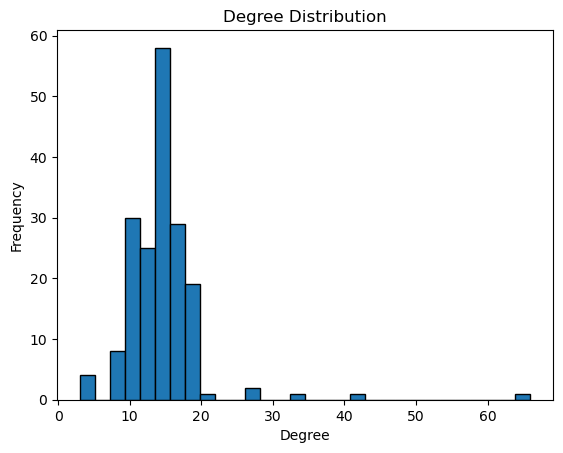

Average clustering coefficient: 0.9773


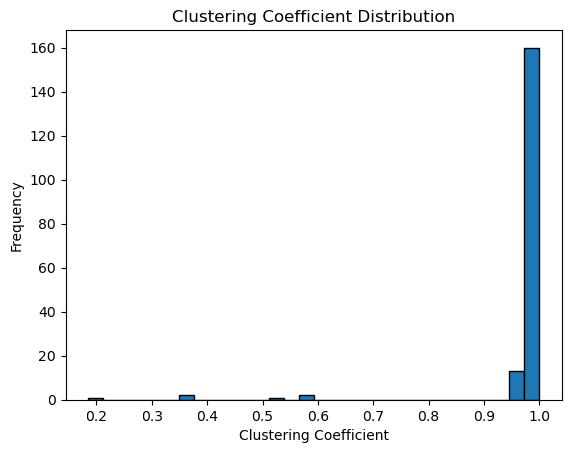

Number of connected components: 8
Size of largest connected component: 84
Most central node (eigenvector centrality): 0xf977814e90da44bfa03b6295a0616a897441acec
Most central node (PageRank): 0xf977814e90da44bfa03b6295a0616a897441acec
Most central node (degree centrality): 0xf977814e90da44bfa03b6295a0616a897441acec
Most central node (closeness centrality): 0xf977814e90da44bfa03b6295a0616a897441acec
Most central node (betweenness centrality): 0xf977814e90da44bfa03b6295a0616a897441acec
Number of communities detected: 9


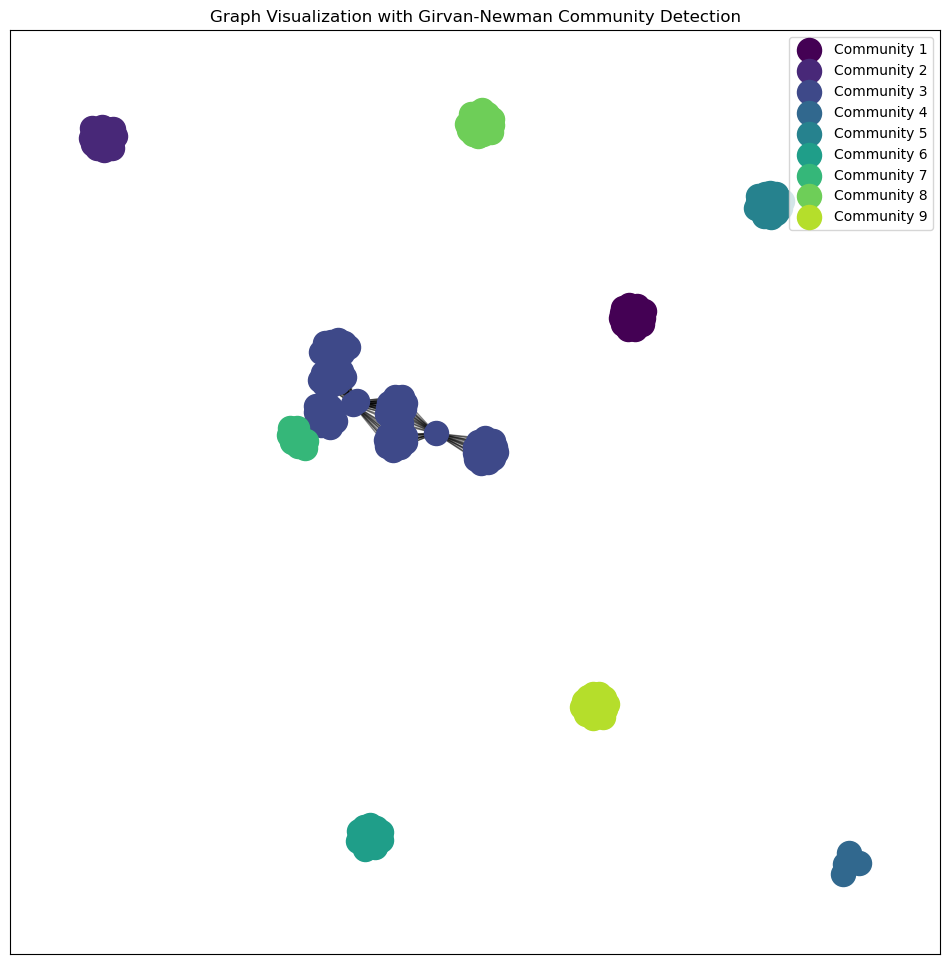

Most central node in LCC (degree centrality): 0xf977814e90da44bfa03b6295a0616a897441acec
Most central node in LCC (closeness centrality): 0xf977814e90da44bfa03b6295a0616a897441acec
Most central node in LCC (betweenness centrality): 0xf977814e90da44bfa03b6295a0616a897441acec


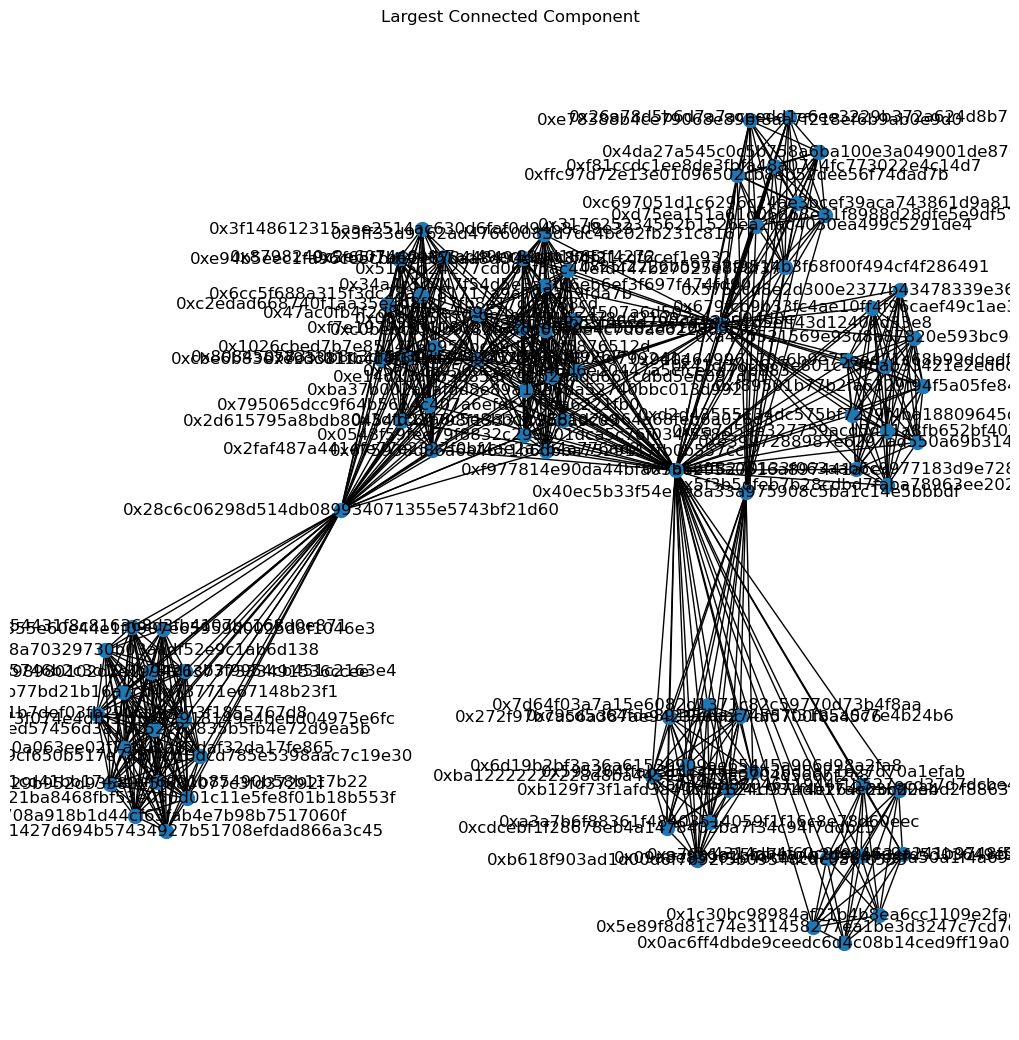

In [93]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community import girvan_newman

# Define the path to the directory containing the graph files
directory_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# List all .graphml files in the directory
graph_files = [f for f in os.listdir(directory_path) if f.endswith('.graphml')]

if len(graph_files) == 0:
    print("No .graphml files found in the directory.")
else:
    # Load a single graph
    graph_file = graph_files[0]
    graph_path = os.path.join(directory_path, graph_file)
    G = nx.read_graphml(graph_path)

    # Check if the graph has nodes and edges
    if len(G.nodes) == 0 or len(G.edges) == 0:
        print(f"Graph {graph_file} is empty.")
    else:
        print(f"Graph {graph_file} has {len(G.nodes)} nodes and {len(G.edges)} edges.")

        # 1. Basic Graph Properties
        num_nodes = len(G.nodes)
        num_edges = len(G.edges)
        avg_degree = sum(dict(G.degree()).values()) / num_nodes

        print(f"Number of nodes: {num_nodes}")
        print(f"Number of edges: {num_edges}")
        print(f"Average degree: {avg_degree:.2f}")

        # 2. Degree Distribution
        degrees = [degree for node, degree in G.degree()]
        plt.figure()
        plt.hist(degrees, bins=30, edgecolor='black')
        plt.title("Degree Distribution")
        plt.xlabel("Degree")
        plt.ylabel("Frequency")
        plt.show()

        # 3. Clustering Coefficients
        clustering_coeff = nx.average_clustering(G)
        clustering_coeffs = nx.clustering(G)
        print(f"Average clustering coefficient: {clustering_coeff:.4f}")

        plt.figure()
        plt.hist(clustering_coeffs.values(), bins=30, edgecolor='black')
        plt.title("Clustering Coefficient Distribution")
        plt.xlabel("Clustering Coefficient")
        plt.ylabel("Frequency")
        plt.show()

        # 4. Connected Components
        connected_components = list(nx.connected_components(G))
        num_connected_components = len(connected_components)
        largest_cc = max(connected_components, key=len)
        G_lcc = G.subgraph(largest_cc).copy()

        print(f"Number of connected components: {num_connected_components}")
        print(f"Size of largest connected component: {len(largest_cc)}")

        # 5. Centrality Measures
        degree_centrality = nx.degree_centrality(G)
        closeness_centrality = nx.closeness_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G)

        try:
            eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
            most_central_node_eigenvector = max(eigenvector_centrality, key=eigenvector_centrality.get)
            print(f"Most central node (eigenvector centrality): {most_central_node_eigenvector}")
        except nx.PowerIterationFailedConvergence:
            print("Eigenvector centrality did not converge within the specified number of iterations.")
            eigenvector_centrality = None

        # PageRank as an alternative to eigenvector centrality
        pagerank_centrality = nx.pagerank(G)
        most_central_node_pagerank = max(pagerank_centrality, key=pagerank_centrality.get)
        print(f"Most central node (PageRank): {most_central_node_pagerank}")

        # Identify most central nodes
        most_central_node_degree = max(degree_centrality, key=degree_centrality.get)
        most_central_node_closeness = max(closeness_centrality, key=closeness_centrality.get)
        most_central_node_betweenness = max(betweenness_centrality, key=betweenness_centrality.get)

        print(f"Most central node (degree centrality): {most_central_node_degree}")
        print(f"Most central node (closeness centrality): {most_central_node_closeness}")
        print(f"Most central node (betweenness centrality): {most_central_node_betweenness}")

        # 6. Community Detection using Girvan-Newman
        communities = girvan_newman(G)
        top_level_communities = next(communities)
        sorted_communities = sorted(map(sorted, top_level_communities))
        num_communities = len(sorted_communities)
        print(f"Number of communities detected: {num_communities}")

        # Visualization
        plt.figure(figsize=(12, 12))
        pos = nx.spring_layout(G)
        cmap = plt.get_cmap('viridis')
        colors = [cmap(i / num_communities) for i in range(num_communities)]
        
        for i, community in enumerate(sorted_communities):
            nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[colors[i]], label=f'Community {i+1}')
        nx.draw_networkx_edges(G, pos, alpha=0.5)
        plt.title('Graph Visualization with Girvan-Newman Community Detection')
        plt.legend()
        plt.show()

        # 7. Further Analysis on the Largest Connected Component
        lcc_degree_centrality = nx.degree_centrality(G_lcc)
        lcc_closeness_centrality = nx.closeness_centrality(G_lcc)
        lcc_betweenness_centrality = nx.betweenness_centrality(G_lcc)

        most_central_lcc_degree = max(lcc_degree_centrality, key=lcc_degree_centrality.get)
        most_central_lcc_closeness = max(lcc_closeness_centrality, key=lcc_closeness_centrality.get)
        most_central_lcc_betweenness = max(lcc_betweenness_centrality, key=lcc_betweenness_centrality.get)

        print(f"Most central node in LCC (degree centrality): {most_central_lcc_degree}")
        print(f"Most central node in LCC (closeness centrality): {most_central_lcc_closeness}")
        print(f"Most central node in LCC (betweenness centrality): {most_central_lcc_betweenness}")

        plt.figure(figsize=(10, 10))
        pos_lcc = nx.spring_layout(G_lcc)
        nx.draw(G_lcc, pos_lcc, node_size=100, with_labels=True)
        plt.title('Largest Connected Component')
        plt.show()


Graph validated_wallet_projection_graph_13422506.graphml has 179 nodes and 1294 edges.
Number of nodes: 179
Number of edges: 1294
Average degree: 14.46


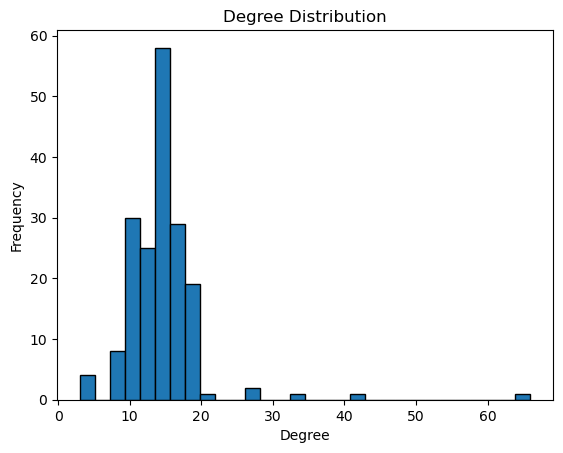

Average clustering coefficient: 0.9773


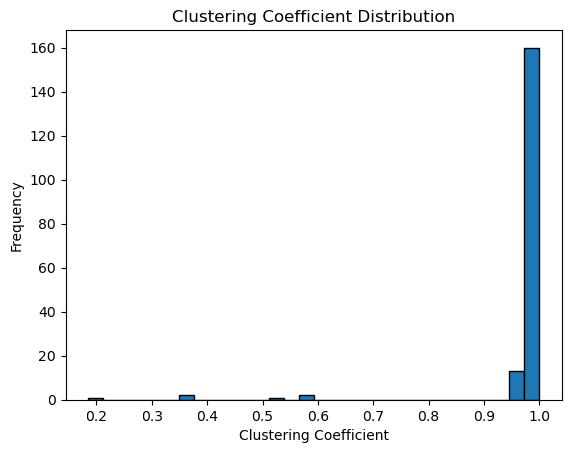

Number of connected components: 8
Size of largest connected component: 84
Most central node (eigenvector centrality): 0xf977814e90da44bfa03b6295a0616a897441acec
Most central node (PageRank): 0xf977814e90da44bfa03b6295a0616a897441acec
Most central node (degree centrality): 0xf977814e90da44bfa03b6295a0616a897441acec
Most central node (closeness centrality): 0xf977814e90da44bfa03b6295a0616a897441acec
Most central node (betweenness centrality): 0xf977814e90da44bfa03b6295a0616a897441acec
Number of communities detected: 28


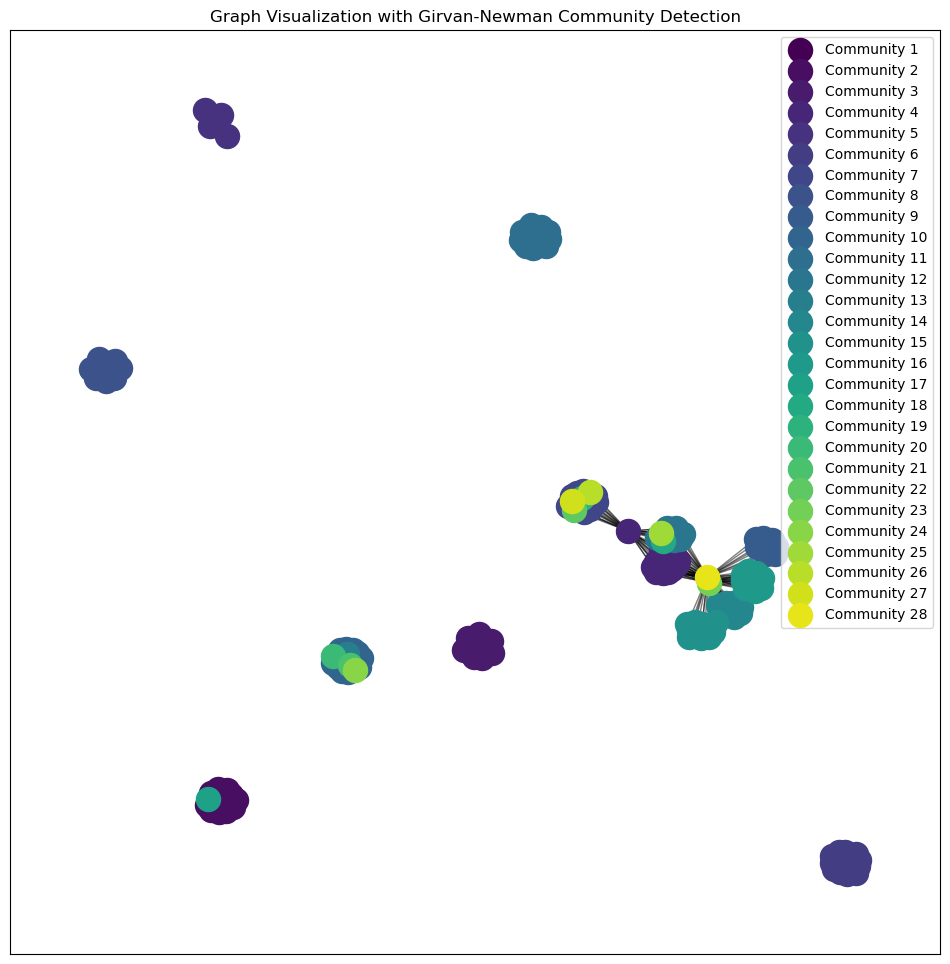

Most central node in LCC (degree centrality): 0xf977814e90da44bfa03b6295a0616a897441acec
Most central node in LCC (closeness centrality): 0xf977814e90da44bfa03b6295a0616a897441acec
Most central node in LCC (betweenness centrality): 0xf977814e90da44bfa03b6295a0616a897441acec


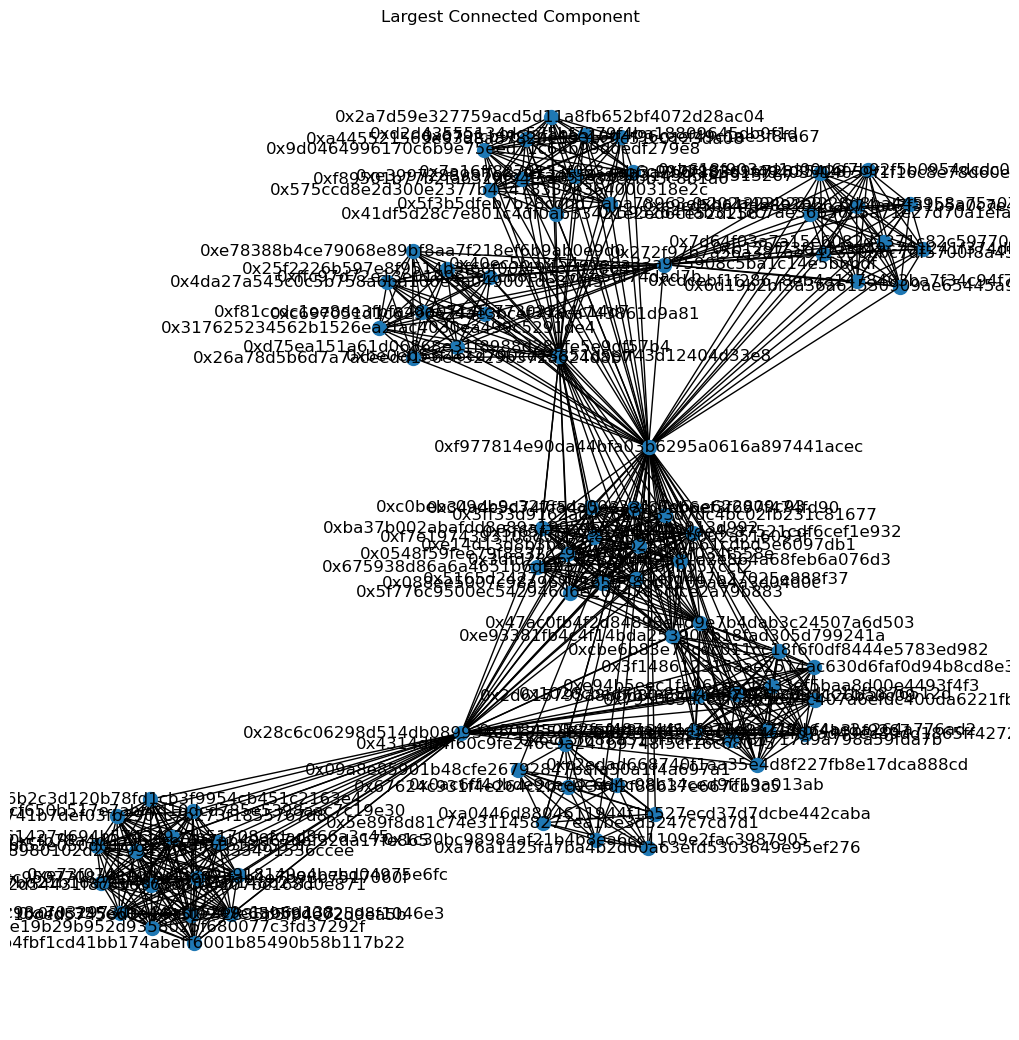

In [94]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
from networkx.algorithms.community import girvan_newman

# Define the path to the directory containing the graph files
directory_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# List all .graphml files in the directory
graph_files = [f for f in os.listdir(directory_path) if f.endswith('.graphml')]

if len(graph_files) == 0:
    print("No .graphml files found in the directory.")
else:
    # Load a single graph
    graph_file = graph_files[0]
    graph_path = os.path.join(directory_path, graph_file)
    G = nx.read_graphml(graph_path)

    # Check if the graph has nodes and edges
    if len(G.nodes) == 0 or len(G.edges) == 0:
        print(f"Graph {graph_file} is empty.")
    else:
        print(f"Graph {graph_file} has {len(G.nodes)} nodes and {len(G.edges)} edges.")

        # 1. Basic Graph Properties
        num_nodes = len(G.nodes)
        num_edges = len(G.edges)
        avg_degree = sum(dict(G.degree()).values()) / num_nodes

        print(f"Number of nodes: {num_nodes}")
        print(f"Number of edges: {num_edges}")
        print(f"Average degree: {avg_degree:.2f}")

        # 2. Degree Distribution
        degrees = [degree for node, degree in G.degree()]
        plt.figure()
        plt.hist(degrees, bins=30, edgecolor='black')
        plt.title("Degree Distribution")
        plt.xlabel("Degree")
        plt.ylabel("Frequency")
        plt.show()

        # 3. Clustering Coefficients
        clustering_coeff = nx.average_clustering(G)
        clustering_coeffs = nx.clustering(G)
        print(f"Average clustering coefficient: {clustering_coeff:.4f}")

        plt.figure()
        plt.hist(clustering_coeffs.values(), bins=30, edgecolor='black')
        plt.title("Clustering Coefficient Distribution")
        plt.xlabel("Clustering Coefficient")
        plt.ylabel("Frequency")
        plt.show()

        # 4. Connected Components
        connected_components = list(nx.connected_components(G))
        num_connected_components = len(connected_components)
        largest_cc = max(connected_components, key=len)
        G_lcc = G.subgraph(largest_cc).copy()

        print(f"Number of connected components: {num_connected_components}")
        print(f"Size of largest connected component: {len(largest_cc)}")

        # 5. Centrality Measures
        degree_centrality = nx.degree_centrality(G)
        closeness_centrality = nx.closeness_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G)

        try:
            eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)
            most_central_node_eigenvector = max(eigenvector_centrality, key=eigenvector_centrality.get)
            print(f"Most central node (eigenvector centrality): {most_central_node_eigenvector}")
        except nx.PowerIterationFailedConvergence:
            print("Eigenvector centrality did not converge within the specified number of iterations.")
            eigenvector_centrality = None

        # PageRank as an alternative to eigenvector centrality
        pagerank_centrality = nx.pagerank(G)
        most_central_node_pagerank = max(pagerank_centrality, key=pagerank_centrality.get)
        print(f"Most central node (PageRank): {most_central_node_pagerank}")

        # Identify most central nodes
        most_central_node_degree = max(degree_centrality, key=degree_centrality.get)
        most_central_node_closeness = max(closeness_centrality, key=closeness_centrality.get)
        most_central_node_betweenness = max(betweenness_centrality, key=betweenness_centrality.get)

        print(f"Most central node (degree centrality): {most_central_node_degree}")
        print(f"Most central node (closeness centrality): {most_central_node_closeness}")
        print(f"Most central node (betweenness centrality): {most_central_node_betweenness}")

        # 6. Community Detection using Girvan-Newman
        k = 20  # Set the level of decomposition to retrieve 'k' communities
        comp = girvan_newman(G)
        limited = itertools.islice(comp, k)
        communities = list(limited)[-1]
        sorted_communities = sorted(map(sorted, communities))
        num_communities = len(sorted_communities)
        print(f"Number of communities detected: {num_communities}")

        # Visualization
        plt.figure(figsize=(12, 12))
        pos = nx.spring_layout(G)
        cmap = plt.get_cmap('viridis')
        colors = [cmap(i / num_communities) for i in range(num_communities)]
        
        for i, community in enumerate(sorted_communities):
            nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[colors[i]], label=f'Community {i+1}')
        nx.draw_networkx_edges(G, pos, alpha=0.5)
        plt.title('Graph Visualization with Girvan-Newman Community Detection')
        plt.legend()
        plt.show()

        # 7. Further Analysis on the Largest Connected Component
        lcc_degree_centrality = nx.degree_centrality(G_lcc)
        lcc_closeness_centrality = nx.closeness_centrality(G_lcc)
        lcc_betweenness_centrality = nx.betweenness_centrality(G_lcc)

        most_central_lcc_degree = max(lcc_degree_centrality, key=lcc_degree_centrality.get)
        most_central_lcc_closeness = max(lcc_closeness_centrality, key=lcc_closeness_centrality.get)
        most_central_lcc_betweenness = max(lcc_betweenness_centrality, key=lcc_betweenness_centrality.get)

        print(f"Most central node in LCC (degree centrality): {most_central_lcc_degree}")
        print(f"Most central node in LCC (closeness centrality): {most_central_lcc_closeness}")
        print(f"Most central node in LCC (betweenness centrality): {most_central_lcc_betweenness}")

        plt.figure(figsize=(10, 10))
        pos_lcc = nx.spring_layout(G_lcc)
        nx.draw(G_lcc, pos_lcc, node_size=100, with_labels=True)
        plt.title('Largest Connected Component')
        plt.show()


## Jaccard Similarity of Validated Network Projection over time 

/Users/liamk/research-project-erc20-governance/src/visualisations/wallet_network_projections_visualisations.py:141: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  cax = ax.matshow(similarity_matrix, interpolation='nearest', cmap='coolwarm')
/Users/liamk/research-project-erc20-governance/src/visualisations/wallet_network_projections_visualisations.py:141: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cax = ax.matshow(similarity_matrix, interpolation='nearest', cmap='coolwarm')


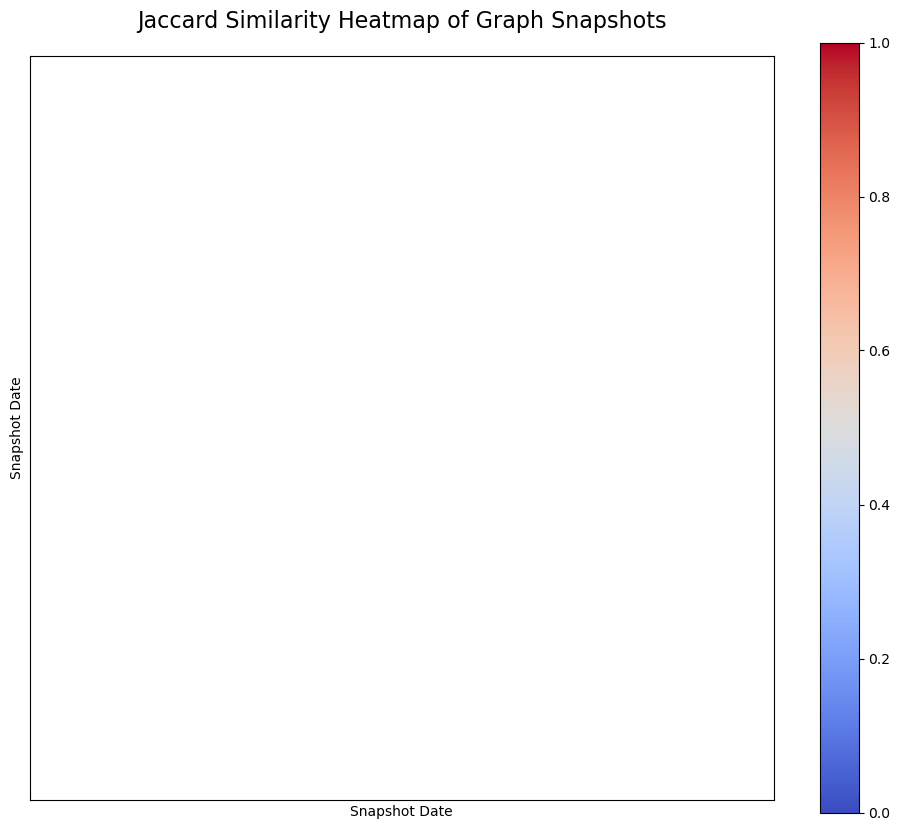

In [26]:
similarity_matrix, snapshot_list = calculate_similarity_matrix(graphs)

plot_similarity_heatmap(similarity_matrix, snapshot_list, dates, output_directory='../output/wallet_network_projections/')